In [1]:
#Clustering-Alogrithms
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
     

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
#will not be using target column as this is clustering.
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#standardScaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

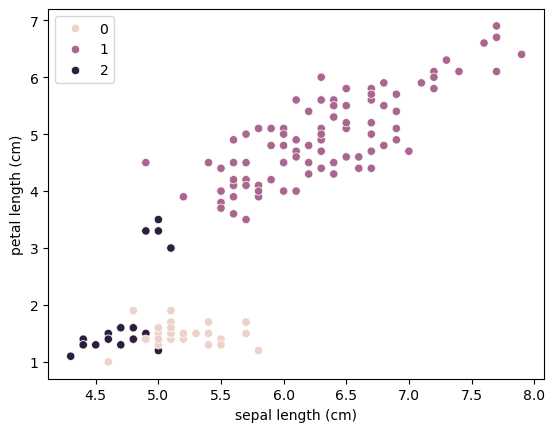

In [7]:
#2 -Algorithms
'''KMeans is an unsupervised learning algoritham ,it will Divide the  data into k clusters by minimizing intra-cluster variance,
for updating clusters it relies on centriods which are updated itreatively then the points will be assigned to the nearest centroid
in this dataset there are 3 featrues so based it we will form the centroids and the nearest 3 points will be assigned to the cluster.'''

from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3)
KM_labels=KM.fit_predict(x_scaled)
KM_labels
X["KMEANS"]=KM_labels
#visualization
sns.scatterplot(x=X.iloc[:,0],y=X.iloc[:,2],hue=KM_labels)



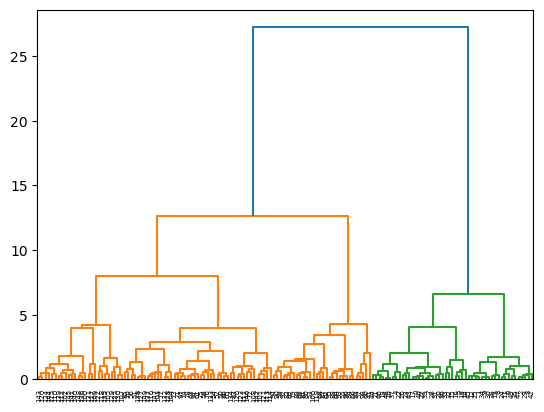

In [9]:
'''Builds a tree of clusters (dendrogram)
Two types: Agglomerative (bottom-up) and Divisive (top-down),it will help in the visualization of Heirarchial relationship between samples,can be used to find groups without fixed k
'''


from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

link = linkage(x_scaled, method='ward')
dendrogram(link,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.show()

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

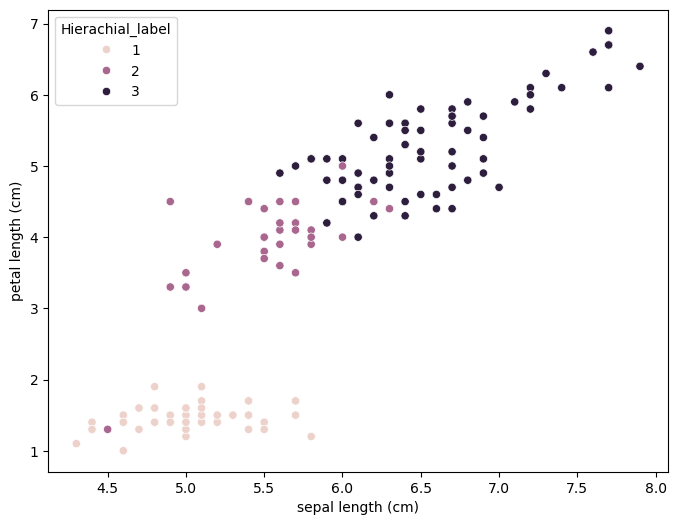

In [11]:
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(link, 3, criterion='maxclust')
X['Hierachial_label']=hierarchical_labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], hue=X['Hierachial_label'])
     